# Title: Which variables are good at predicting whether or not someone has heart disease?

## Introduction (Kevin)
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question


*Heart disease is a common disease amongst many people, especially seniors. It is critical to be able to identify if a senior does have heart disease or not so that they can proceed to the treatment they need. However, sometimes it is difficult to determine if a senior has heart disease without considering solid factors that are good at determing a diagnosis. In this data exploration, different variables will be tested to see if they are good at predicting whether or not someone has heart disease. The main question to be answered in this analysis is, which variables are good at predicting whether or not someone has heart disease? By answering this question, the variables good at predicting if someone has heart disease or not can be reported and used as factors to consider when determining if a senior has heart disease or not. The variables not good at predicting can simply be neglected. The heart disease dataset from UCI will be used in this data exploration. The major variables that will be used in this analysis are.....*

## Preliminary exploratory data analysis (Chloe)
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [1]:
#PRELIMINARY EXPLORATORY DATA ANALYSIS CODE HERE

In [ ]:
# necessary library
library(tidyverse)
library(readr)
library(tidymodels)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [51]:
# read data
heart_data <- read_table("data/cleve.mod", skip = 20, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                                                                    "thalach", "exang", "oldpeak", "slope", "ca", "thal", 
                                                                    "disease"), na = "?")


head(heart_data)


── Column specification ────────────────────────────────────────────────────────
cols(
  age = col_double(),
  sex = col_character(),
  cp = col_character(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_character(),
  restecg = col_character(),
  thalach = col_double(),
  exang = col_character(),
  oldpeak = col_double(),
  slope = col_character(),
  ca = col_double(),
  thal = col_character(),
  disease = col_character()
)

Warning message:
“303 parsing failures.
row col   expected     actual             file
  1  -- 14 columns 15 columns 'data/cleve.mod'
  2  -- 14 columns 15 columns 'data/cleve.mod'
  3  -- 14 columns 15 columns 'data/cleve.mod'
  4  -- 14 columns 15 columns 'data/cleve.mod'
  5  -- 14 columns 15 columns 'data/cleve.mod'
... ... .......... .......... ................
See problems(...) for more details.
”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
63,male,angina,145,233,true,hyp,150,fal,2.3,down,0,fix,buff
67,male,asympt,160,286,fal,hyp,108,true,1.5,flat,3,norm,sick
67,male,asympt,120,229,fal,hyp,129,true,2.6,flat,2,rev,sick
37,male,notang,130,250,fal,norm,187,fal,3.5,down,0,norm,buff
41,fem,abnang,130,204,fal,hyp,172,fal,1.4,up,0,norm,buff
56,male,abnang,120,236,fal,norm,178,fal,0.8,up,0,norm,buff


In [52]:
set.seed(8888)
# split data into training and testing data
heart_split <- initial_split(heart_data, prop = 0.75, strata = disease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [53]:
#locate missing data (training data)
train_missing_column <- colSums(is.na(heart_train))
locate_missing_train <- which(!complete.cases(heart_train))
sum_missing_train <- sum(is.na(heart_train))

cat("Summary of Missing Data in Training Data ")
cat("Number of Missing Data in Each Column: \n")
train_missing_column
cat("Location of Rows That Have Missing Data: ", locate_missing_train, "\n")
cat("Number of Rows That have Missing Data: ", sum_missing_train)

Summary of Missing Data in Training Data Number of Missing Data in Each Column: 


age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal  disease 
       0        0        0        3        2        0

Location of Rows That Have Missing Data:  34 56 101 181 192 
Number of Rows That have Missing Data:  5

In [54]:
# Frequency of Each Class
cat("Frequency of Each Class (0 = Healthy, 1-4 = Sick): \n")
table(heart_data$disease)
#Proportion of Each Class
cat("Proportion of Each Class (0 = Healthy, 1-4 = Sick): \n")
prop.table(table(heart_data$disease))

Frequency of Each Class (0 = Healthy, 1-4 = Sick): 



buff sick 
 165  138 

Proportion of Each Class (0 = Healthy, 1-4 = Sick): 



     buff      sick 
0.5445545 0.4554455 

The box-plots does not overlap, maximum heart rate achieved is statistical significant in determine heart disease.

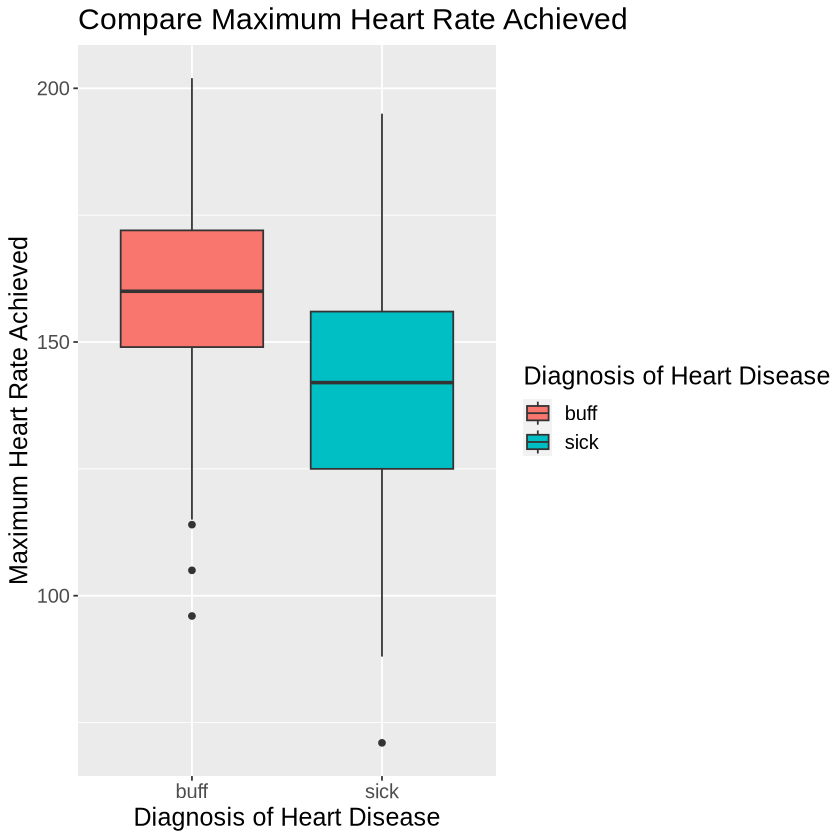

The box-plots overlap, serum cholestoral level is not statistical significant in determine heart disease.

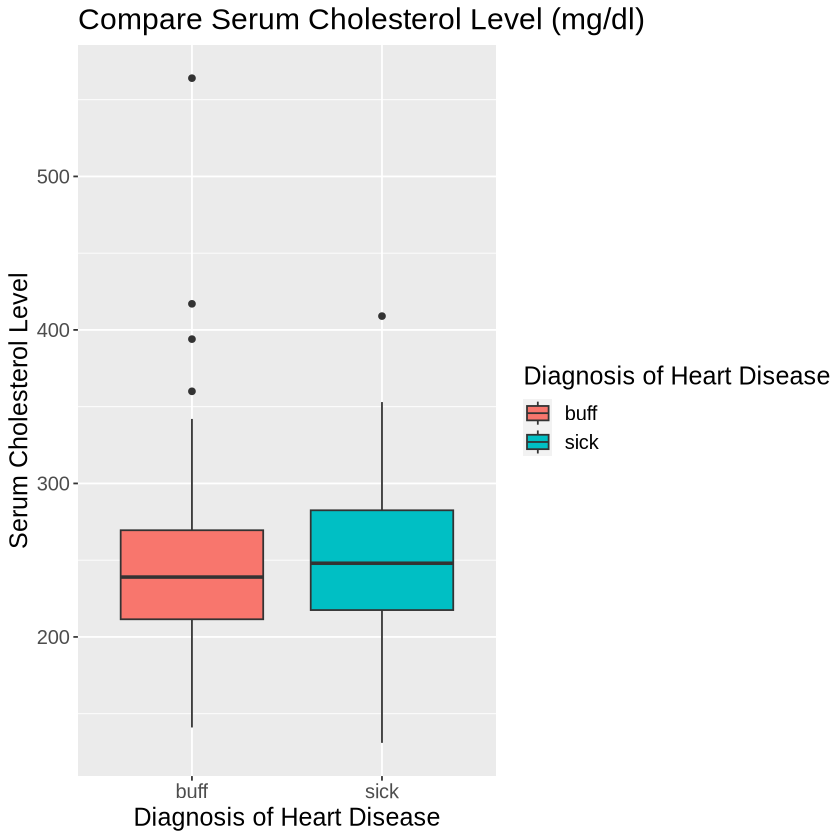

The box-plots do not overlap, depression induced by exercise relative to rest is statistical significant in determine heart disease.

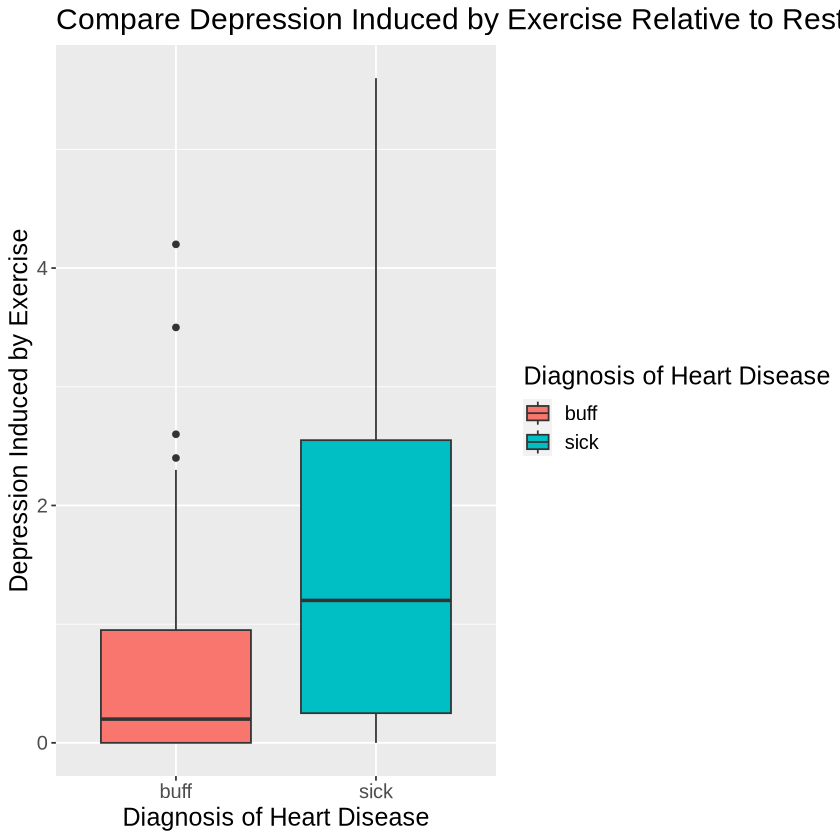

The box-plots overlap, resting blood pressure  is not statistical significant in determine heart disease.

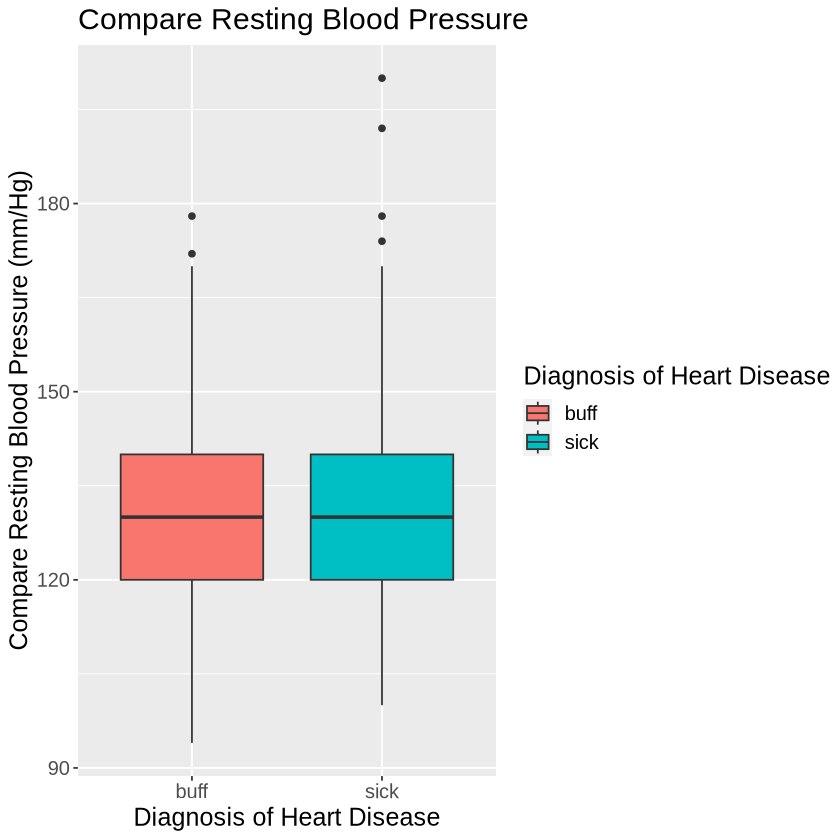

In [55]:
# Visualization (boxplots)
#compare thalach 
thalach_boxplot <- heart_train |>
  ggplot(aes(x = disease, y = thalach, group = disease)) +
  geom_boxplot(aes(fill = disease)) +
  labs(title = "Compare Maximum Heart Rate Achieved",
       x = "Diagnosis of Heart Disease", 
       y = "Maximum Heart Rate Achieved",
       fill = "Diagnosis of Heart Disease") +
       theme(text = element_text(size = 15))
thalach_boxplot

cat("The box-plots does not overlap, maximum heart rate achieved is statistical significant in determine heart disease.")


#compare serum cholestoral level between sick or not
chol_boxplot <- heart_train |>
  ggplot(aes(x = disease, y = chol, group = disease)) +
  geom_boxplot(aes(fill = disease)) +
  labs(title = "Compare Serum Cholesterol Level (mg/dl)",
       x = "Diagnosis of Heart Disease",
       y = "Serum Cholesterol Level",
       fill = "Diagnosis of Heart Disease") +
       theme(text = element_text(size = 15))
chol_boxplot

cat("The box-plots overlap, serum cholestoral level is not statistical significant in determine heart disease.")

#compare ST depression induced by exercise relative to rest between sick or not
oldpeak_boxplot <- heart_train |>
  ggplot(aes(x = disease, y = oldpeak, group = disease)) +
  geom_boxplot(aes(fill = disease)) +
  labs(title = "Compare Depression Induced by Exercise Relative to Rest",
       x = "Diagnosis of Heart Disease",
       y = "Depression Induced by Exercise",
       fill = "Diagnosis of Heart Disease") +
       theme(text = element_text(size = 15))
oldpeak_boxplot

cat("The box-plots do not overlap, depression induced by exercise relative to rest is statistical significant in determine heart disease.")

trestbps_boxplot <- heart_train |> 
  ggplot(aes(x = disease, y = trestbps, group = disease)) +
  geom_boxplot(aes(fill = disease)) +
  labs(title = "Compare Resting Blood Pressure",
       x = "Diagnosis of Heart Disease",
       y = "Compare Resting Blood Pressure (mm/Hg)",
       fill = "Diagnosis of Heart Disease") +
       theme(text = element_text(size = 15))
trestbps_boxplot

cat("The box-plots overlap, resting blood pressure  is not statistical significant in determine heart disease.")


disease,prop_exang,prop_fbs
<chr>,<dbl>,<dbl>
buff,0.1219512,0.1626016
sick,0.5533981,0.1456311


The proportion of people who has exercise induced angina is generally higher in groups of people who has heart disease

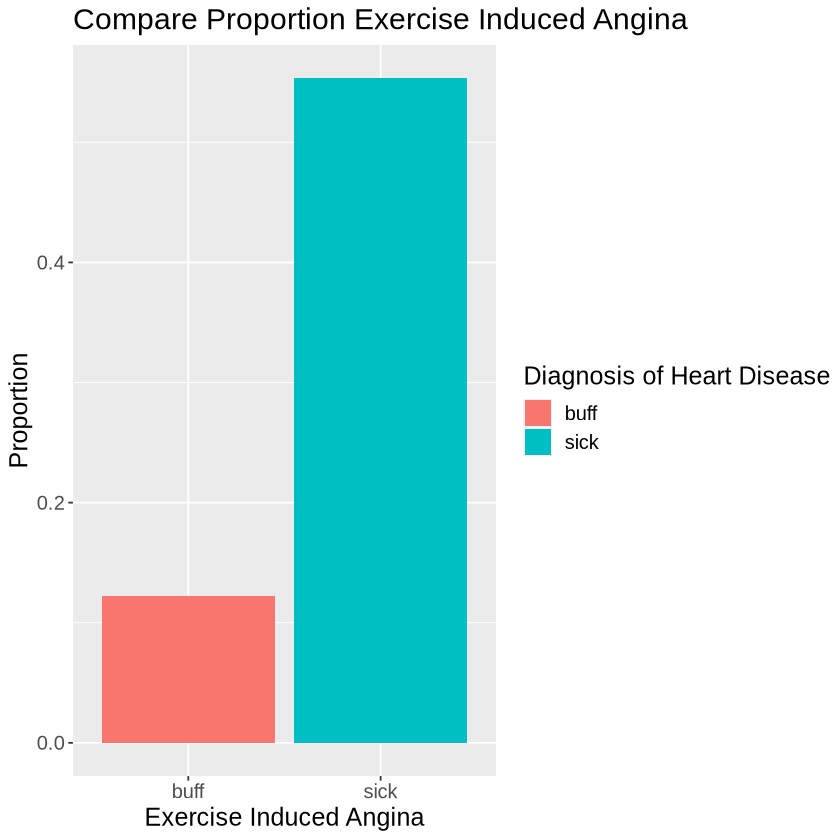

The proportion of people who has fasting blood sugar > 120 mg/dl is approximatly the same in groups of people who has heart disease

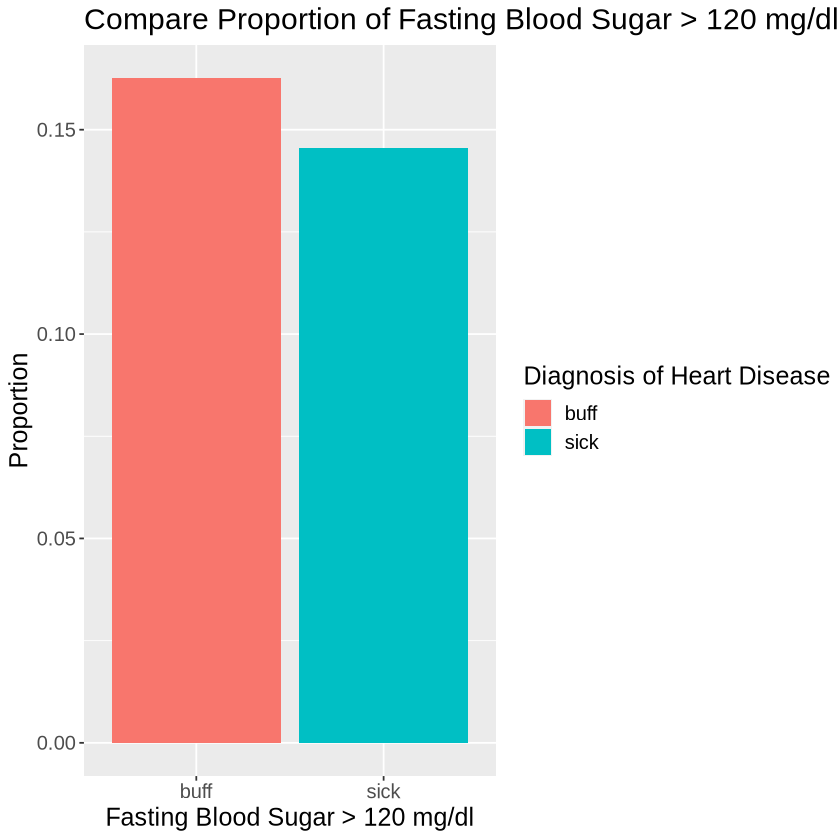

In [56]:
# Visualization (boxplots)
prop_heart <- heart_train|>
    group_by(disease) |>
    summarize(prop_exang = mean(exang == "true"), prop_fbs = mean(fbs == "true"))
head(prop_heart)
exang_bar <- prop_heart |>
  ggplot(aes(x = disease, y = prop_exang, fill = disease)) +
  geom_bar(stat = "identity") +
  labs(title = "Compare Proportion Exercise Induced Angina",
       x = "Exercise Induced Angina", 
       y = "Proportion",
       fill = "Diagnosis of Heart Disease") +
       theme(text = element_text(size = 15))
exang_bar

cat("The proportion of people who has exercise induced angina is generally higher in groups of people who has heart disease")

fbs_bar <- prop_heart |>
  ggplot(aes(x = disease, y = prop_fbs, fill = disease)) +
  geom_bar(stat = "identity") +
  labs(title = "Compare Proportion of Fasting Blood Sugar > 120 mg/dl",
       x = "Fasting Blood Sugar > 120 mg/dl", 
       y = "Proportion",
       fill = "Diagnosis of Heart Disease") +
       theme(text = element_text(size = 15))
fbs_bar

cat("The proportion of people who has fasting blood sugar > 120 mg/dl is approximatly the same in groups of people who has heart disease")


## Methods (Tom):
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results

Data will be obtained through the "Heart Disease" dataset, particularity the datasets "Switzerland" and "Hungary". Classification techniques will be used in order to figure out the question mentioned in the Introduction. Several visualizations will be made, and their results will be interpreted in order to choose the relevant variables to solve the question. The first of these will be involving serum cholesterol levels and heart disease diagnosis, using a boxplot for visualization. The plot suggests that serum cholesterol levels are not statistically significant in determining heart health.


## Expected outcomes and significance (Michael):
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

We expect to predict which variables are effective for predicting a heart disease diagnosis. These findings could help healthcare practioners determine the risk of patients depending on other measures about their health. These types of analyses could lead to further investigation into the root cause and biological mechanisms of such connections once correlations are drawn, and the overall advancement of medicine.